<a href="https://colab.research.google.com/github/asgardsun/Content-Based-Recommendation/blob/main/Content_Based_Recommendation_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

###Read Data

In [2]:
ratings= pd.read_pickle('/content/drive/MyDrive/recommendation/data/ratings_updated.p')
genres= pd.read_pickle('/content/drive/MyDrive/recommendation/data/genres.p')

###User Profile

In [3]:
user414=ratings[ratings['userId'] == 414]
user414.sample()

,userId,movieId,rating,timestamp
64163,414,6568,2.0,2004-10-24 18:54:09


In [4]:
len(user414)

2698

Preprocessing(전처리)

In [5]:
user414 = user414.merge(genres, left_on='movieId',right_index=True)
user414.sample()

,userId,movieId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
64865,414,96417,3.0,2012-12-22 00:24:05,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


train_test_split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(user414[genres.columns],
                                                    user414['rating'],
                                                    random_state=42,
                                                    test_size=.1)

In [8]:
#feature, X : y를 예측하기 위해 필요한 정보들
#label, y : 정답(궁극적인 목표)
print(X_train.shape) 
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(2428, 20)
(2428,)
(270, 20)
(270,)


In [9]:
X_train.sample()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
64851,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0


Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()

In [12]:
reg.fit(X_train, y_train)

LinearRegression()

In [13]:
reg.coef_

array([ 1.04932187, -0.16519465,  0.12503892,  0.66646026, -0.29618416,
       -0.06757262,  0.1753061 ,  0.43261644,  0.31547858,  0.05636728,
        0.29277987, -0.1206128 ,  0.35832908,  0.03551429,  0.25847584,
       -0.01912917,  0.1634995 , -0.13939399,  0.43835199,  0.29161535])

In [14]:
#절편의 구성
reg.intercept_ 

3.2006781277575804

In [15]:
##user414의 절편이 3.2
#해당 유저는 아무런 장르가 정보가 없는 영화에 대해서는
#회귀 직선의 intercept 3.2 + (no genre listed) 변수의 chef 1.04 = 약 4.24점의 점수를 줄것이라는 예측을 할 수 있다.

In [16]:
reg.coef_[1] #Action에 해당하는 coef

-0.16519464857050484

In [17]:
#baseline score + Action 장르에 대한 coefficient

#Action 장르 예상 평점
print(reg.intercept_ + reg.coef_[1]) 

#Action|Adventure 장르 예상 평점
print(reg.intercept_ + reg.coef_[1] + reg.coef_[2]) 

3.0354834791870755
3.160522395196149


In [18]:
list(zip(X_train.columns,reg.coef_)) 

[('(no genres listed)', 1.0493218722424231),
 ('Action', -0.16519464857050484),
 ('Adventure', 0.12503891600907355),
 ('Animation', 0.6664602615156151),
 ('Children', -0.29618416468814696),
 ('Comedy', -0.06757261930358595),
 ('Crime', 0.1753060983929331),
 ('Documentary', 0.43261644111066405),
 ('Drama', 0.3154785770859152),
 ('Fantasy', 0.05636727626646805),
 ('Film-Noir', 0.29277987382219867),
 ('Horror', -0.12061279616418609),
 ('IMAX', 0.35832907660236973),
 ('Musical', 0.03551428543515968),
 ('Mystery', 0.25847584237065857),
 ('Romance', -0.019129170010523965),
 ('Sci-Fi', 0.16349949992464524),
 ('Thriller', -0.13939399479870948),
 ('War', 0.4383519944116417),
 ('Western', 0.2916153540360612)]

In [19]:
%matplotlib inline

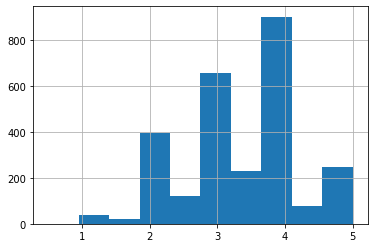

In [20]:
user414['rating'].hist()

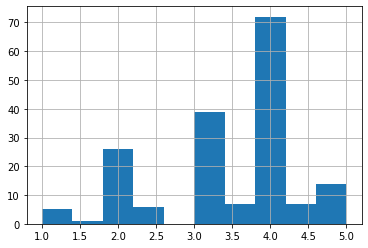

In [21]:
#user414가 제일 싫어하는 장르
user414.loc[user414['Children'] ==1,'rating'].hist()

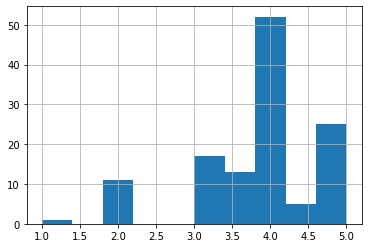

In [22]:
#user414가 좋아하는 장르
user414.loc[user414['War'] ==1,'rating'].hist()

In [23]:
predict = reg.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
mse = mean_squared_error(y_test,predict)
rmse = np.sqrt(mse)
rmse

0.8764429330252586

###전체 데이터로 확장(전체 유저의 프로필 만들기)

In [26]:
#전처리
ratings = ratings.merge(genres, left_on='movieId',right_index=True)
ratings.sample()

,userId,movieId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
10622,68,1590,2.0,2006-09-17 23:31:43,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


In [27]:
#train_test_split
train, test = train_test_split(ratings, test_size=0.1, random_state=42)

In [28]:
train

,userId,movieId,rating,timestamp,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
20871,138,898,5.0,2008-09-29 08:15:07,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
97084,604,196,3.0,1996-05-14 13:21:51,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
68182,438,34334,2.5,2005-12-26 19:20:58,0,1,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
76135,479,2694,3.0,2002-12-08 15:50:30,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
84263,539,3264,3.5,2012-03-23 03:48:57,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36445,249,1089,4.0,2012-09-04 11:22:25,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
11274,68,44199,4.0,2008-04-21 02:25:25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
47164,307,3177,2.0,2007-08-03 20:34:07,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1671,17,110,4.5,2011-05-18 05:27:50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
user_profile_list = []
for userId in train['userId'].unique():
    user = train[train['userId']== userId]
    X_train = user[genres.columns] # feature, X (장르 정보가 X에 들어가고 )
    y_train = user['rating'] #label, y (이 영화의 최종적인 rating 결과 Y 컬럼에 들어간다.)

    reg = LinearRegression()
    reg.fit(X_train, y_train)

    user_profile_list.append([reg.intercept_, *reg.coef_])

In [30]:
user_profile_list

[[2.1291390728476802,
  -3.885780586188048e-15,
  1.7342715231788102,
  1.9954470198675518,
  1.1626655629139075,
  1.1626655629139087,
  1.0173841059602637,
  -3.5062086092715217,
  -3.1086244689504383e-15,
  1.6254139072847686,
  -3.4043874172185453,
  9.992007221626409e-16,
  0.0,
  -2.206125827814567,
  0.0,
  1.493377483443709,
  0.18253311258278274,
  -0.5045529801324494,
  -1.241721854304636,
  -3.9888245033112577,
  0.0],
 [3.317292707447516,
  0.0,
  0.21005975526592324,
  0.06744995629601883,
  -0.08519953244493057,
  0.4643729874471927,
  -0.13568884885840987,
  0.06709164936351013,
  2.7755575615628914e-16,
  0.143274245795403,
  -0.10676812994562977,
  -1.6653345369377348e-16,
  0.23822829113725089,
  0.16739223885924623,
  -0.6089626511957681,
  0.10922709303861323,
  -0.14812762016762632,
  0.03424351990668637,
  0.09937346457612029,
  -0.5965628984250299,
  0.04015973830301644],
 [3.227998252679542,
  0.0,
  0.1324752575530157,
  -0.0054631255404090796,
  0.464377829679

In [31]:
#표 형태로 표시
user_profile = pd.DataFrame(user_profile_list, 
                            index=train['userId'].unique(), 
                            columns=['intercept',*genres.columns])


In [32]:
pd.set_option('float_format', '{:f}'.format)

In [33]:
user_profile

,intercept,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
138,2.129139,-0.000000,1.734272,1.995447,1.162666,1.162666,1.017384,-3.506209,-0.000000,1.625414,...,0.000000,0.000000,-2.206126,0.000000,1.493377,0.182533,-0.504553,-1.241722,-3.988825,0.000000
604,3.317293,0.000000,0.210060,0.067450,-0.085200,0.464373,-0.135689,0.067092,0.000000,0.143274,...,-0.000000,0.238228,0.167392,-0.608963,0.109227,-0.148128,0.034244,0.099373,-0.596563,0.040160
438,3.227998,0.000000,0.132475,-0.005463,0.464378,0.051656,0.004775,-0.054601,0.491341,0.179308,...,0.679149,-0.099226,0.648229,-0.082486,-0.122707,-0.085684,-0.270363,0.137685,0.069041,0.249923
479,3.108068,0.000000,-1.087746,0.671782,0.473410,-0.818861,0.142270,0.180880,-0.108068,0.680194,...,0.000000,-0.118859,-1.216262,0.481576,-0.056888,0.014109,-0.475843,-0.094396,-0.140261,-0.013620
539,3.261733,0.000000,0.732362,0.506601,0.698293,0.237008,-0.156746,0.405910,0.000000,0.316011,...,-0.000000,0.412651,-0.272650,-1.749829,-0.000000,0.702939,-1.468347,-0.525748,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,4.372372,-0.000000,-0.093093,-0.549550,0.348348,-0.390390,0.798799,-0.783784,-0.000000,0.057057,...,-0.000000,1.576577,1.120120,-0.390390,0.000000,-2.363363,0.012012,-0.165165,0.000000,0.120120
277,3.171202,0.000000,0.462302,-0.174603,-0.318878,-0.418934,0.247732,-0.706633,0.000000,-0.255952,...,0.000000,0.000000,-0.000000,-0.042517,1.172052,-0.413832,0.450964,0.205782,0.000000,0.000000
320,7.500000,-0.000000,-3.500000,3.000000,3.500000,3.750000,-4.250000,-4.000000,4.250000,-3.500000,...,-0.000000,4.250000,-6.500000,-0.000000,15.000000,-3.500000,3.500000,-7.500000,0.000000,0.000000
595,2.120000,0.000000,0.811429,-0.411429,-0.154286,-0.154286,1.120000,-0.080000,-0.000000,2.160000,...,-0.000000,0.000000,0.000000,1.068571,2.880000,-0.400000,1.440000,0.080000,0.000000,0.000000


###평점 예측하기

In [34]:
from tqdm import tqdm_notebook

In [35]:
predict = []
for idx, row in tqdm_notebook(test.iterrows()) :
  user = row['userId'] # test row에 user
  intercept = user_profile.loc[user, 'intercept']# 해당 user에 user_profile에서 intercept
  # 해당 moive의 장르에서 비롯되는 예상 평점
  genere_score = sum(user_profile.loc[user, genres.columns] * row[genres.columns])
  expected_score = intercept + genere_score
  predict.append(expected_score)



0it [00:00, ?it/s]

In [36]:
test['predict'] = predict

In [37]:
rmse = np.sqrt(mean_squared_error(test['rating'], test['predict']))
rmse

0.9846471630013417

###문제?
- 데이터 갯수가 적은 user에게 coefficient 계산이 정확하지 않음, 또는 train 데이터만 설명할 수 있음(오버피팅)
-해결책은?
 - 빈도 수가 낮은 장르 없애기
 - correlation이 높은 장르들을 합치기
 - 데이터가 적은 user에 대해서 전체 평균을 사용, user 별 평균, content based 1번 방법론 사용 등 다른 방법들을 섞어서 해결(앙상블)
 - 정규화가 가능한 linear model 사용 (Ridge, Lasso 등)

- 제1정규화 (Lasso)
   - 제1정규화에는 feature selection가 있는데 쓸모있는 변수는 남기고, 그렇지 않은 변수들은   제거하는 기능으로 탁월하다.

In [39]:
from sklearn.linear_model import Lasso

In [41]:
user_profile_list = []
for userId in train['userId'].unique():
    user = train[train['userId']== userId]
    X_train = user[genres.columns] # feature, X (장르 정보가 X에 들어가고 )
    y_train = user['rating'] #label, y (이 영화의 최종적인 rating 결과 Y 컬럼에 들어간다.)

    reg = Lasso(alpha=0.03)
    reg.fit(X_train, y_train)

    user_profile_list.append([reg.intercept_, *reg.coef_])

In [43]:
user_profile_lasso = pd.DataFrame(user_profile_list, 
                            index=train['userId'].unique(), 
                            columns=['intercept',*genres.columns])
user_profile_lasso

,intercept,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
138,3.493337,0.000000,0.743861,1.275150,0.564536,0.000000,0.125074,-0.985567,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-0.000000,0.771962,-0.000000,-1.814475,-2.167198,0.000000
604,3.554203,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.166822,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.076554,0.000000,0.059142,-0.000000,0.000000
438,3.356514,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000
479,3.237503,0.000000,-0.773015,0.000000,0.000000,-0.047315,0.012001,0.000000,-0.000000,0.499804,...,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.227235,-0.000000,-0.000000,0.000000
539,3.480265,0.000000,0.172199,0.281458,0.594596,0.000000,-0.000000,0.000000,0.000000,0.172511,...,0.000000,0.117541,0.000000,-0.000000,0.000000,0.000000,-0.718301,-0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,4.352877,0.000000,-0.487663,-0.260418,-0.000000,-0.524566,0.299521,-0.188661,0.000000,-0.000000,...,0.000000,0.325811,0.397565,-0.000000,0.000000,-1.394300,0.068783,-0.000000,0.000000,-0.000000
277,3.293950,0.000000,0.118452,-0.000000,-0.000000,-0.202832,-0.000000,-0.000000,0.000000,-0.177732,...,0.000000,0.000000,0.000000,-0.000000,0.308113,-0.068408,0.416643,0.291299,0.000000,0.000000
320,3.576152,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.569475,...,0.000000,0.000000,0.000000,0.000000,0.483323,-0.000000,0.000000,-0.000000,0.000000,0.000000
595,3.701885,0.000000,0.000000,0.000000,0.106386,0.000000,-0.027127,0.758357,0.000000,0.594200,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.027582,0.276432,0.000000,0.000000,0.000000


In [44]:
predict = []
for idx, row in tqdm_notebook(test.iterrows()) :
  user = row['userId'] # test row에 user
  intercept = user_profile_lasso.loc[user, 'intercept']# 해당 user에 user_profile에서 intercept
  # 해당 moive의 장르에서 비롯되는 예상 평점
  genere_score = sum(user_profile_lasso.loc[user, genres.columns] * row[genres.columns])
  expected_score = intercept + genere_score
  predict.append(expected_score)

0it [00:00, ?it/s]

In [45]:
test['predict_lasso'] = predict

In [48]:
rmse = np.sqrt(mean_squared_error(test['rating'], test['predict_lasso']))
rmse

0.9235813633442955